In [3]:
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [19]:
import numpy as np
new_df = df.pivot_table(
    index='race',
    columns='signs_of_mental_illness',
    values='id',
    aggfunc='count'
)

In [21]:
new_df

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [53]:
def proz_true(row):
    return (row[True] / (row[True] + row[False]))* 100

new_df['Proz_True [in %]'] = new_df.apply(proz_true, axis=1).round(1)

In [67]:
new_df.sort_values(by='Proz_True [in %]',ascending=False)

signs_of_mental_illness,False,True,Proz_True [in %]
race,,,
W,1763,713,28.8
A,69,24,25.8
O,37,11,22.9
N,64,14,17.9
H,745,157,17.4
B,1114,184,14.2


Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [71]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [73]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.day_name().head()

0      Friday
1      Friday
2    Saturday
3      Sunday
4      Sunday
Name: date, dtype: object

In [79]:
df['Day of intervention'] = df['date'].dt.day_name()

In [83]:
df['Day of intervention'].value_counts()

Day of intervention
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

In [87]:
df_day_counts = df['Day of intervention'].value_counts()

In [91]:
df_day_counts = df_day_counts.reset_index()

In [121]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_day_counts['Day of intervention'] = pd.Categorical(df_day_counts['Day of intervention'], categories=day_order, ordered=True)

df_day_counts = df_day_counts.sort_values('Day of intervention')

In [95]:
import seaborn as sns


In [97]:
import matplotlib.pyplot as plt

In [123]:
df_day_counts.set_index('Day of intervention')

,count
Day of intervention,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


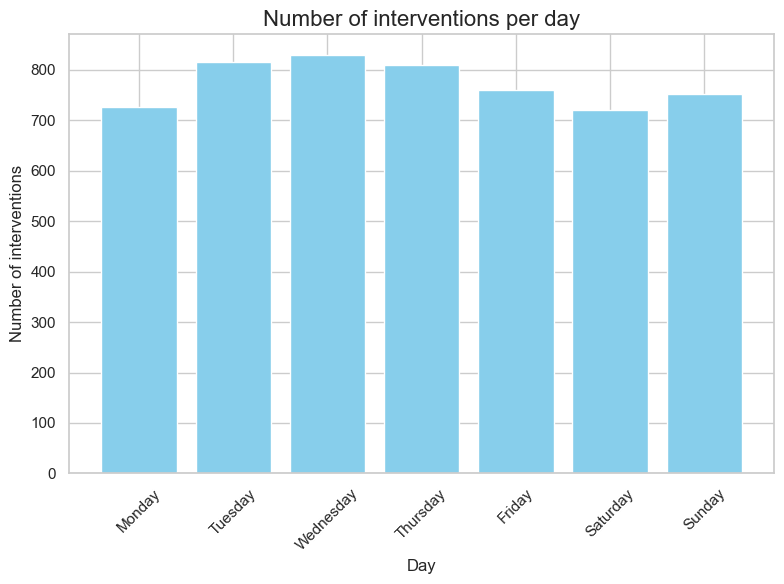

In [135]:
plt.figure(figsize=(8, 6))
plt.bar(df_day_counts['Day of intervention'], df_day_counts['count'], color='skyblue')
plt.title('Number of interventions per day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of interventions', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [162]:
data_states_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [164]:
df_data_states_population = data_states_population[0]

In [168]:
df_data_states_population.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [160]:
data_states_shortcuts = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [176]:
df_data_states_shortcuts = data_states_shortcuts[1]

In [178]:
df_data_states_shortcuts.head()

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN


In [184]:
df['state'].value_counts()

state
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
MO    141
TN    139
LA    109
PA    108
NM    106
IL    104
AL    104
NY    101
NV     96
KY     95
IN     95
VA     95
WI     91
OR     88
SC     88
AR     83
MD     79
MI     78
NJ     68
MS     65
MN     61
UT     60
WV     54
KS     50
ID     42
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
NH     13
DC     13
DE     13
ND     11
VT      9
RI      4
Name: count, dtype: int64

In [200]:
df_state_count = df['state'].value_counts()

In [202]:
df_state_count.head()

state
CA    799
TX    481
FL    350
AZ    254
CO    195
Name: count, dtype: int64

In [204]:
df_state_count = df_state_count.reset_index()

In [206]:
df_state_count

,state,count
0,CA,799
1,TX,481
2,FL,350
3,AZ,254
4,CO,195
5,GA,182
6,OK,164
7,NC,156
8,OH,155
9,WA,152


In [220]:
df_data_states_population = df_data_states_population[['State','Census population, April 1, 2020 [1][2]']]

In [222]:
df_data_states_population.head()

,State,"Census population, April 1, 2020 [1][2]"
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [224]:
df_data_states_shortcuts[['Name','ANSI']]

,Name,ANSI
0,Name,NaN
1,United States of America,US
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
...,...,...
74,Nebraska,NaN
75,Northern Mariana Islands,NaN
76,Panama Canal Zone,NaN
77,Philippine Islands,NaN


In [226]:
df_data_states_shortcuts = df_data_states_shortcuts[['Name','ANSI']]

In [238]:
df_data_states_shortcuts = df_data_states_shortcuts.rename(columns={'Name':'State','ANSI':'state'})

In [240]:
df_data_states_shortcuts

,State,state
0,Name,NaN
1,United States of America,US
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
...,...,...
74,Nebraska,NaN
75,Northern Mariana Islands,NaN
76,Panama Canal Zone,NaN
77,Philippine Islands,NaN


In [244]:
df_combined = pd.merge(df_data_states_shortcuts,df_data_states_population,on='State')

In [248]:
df_combined = pd.merge(df_combined,df_state_count,on='state')

In [250]:
df_combined.head()

,State,state,"Census population, April 1, 2020 [1][2]",count
0,Alabama,AL,5024279,104
1,Alaska,AK,733391,39
2,Arizona,AZ,7151502,254
3,Arkansas,AR,3011524,83
4,California,CA,39538223,799


In [254]:
df_combined_renamed = df_combined.rename(columns={'state':'State_Abbriviation','Census population, April 1, 2020 [1][2]':'Population','count':'Number of interventions in total'})

In [256]:
df_combined_renamed.head()

,State,State_Abbriviation,Population,Number of interventions in total
0,Alabama,AL,5024279,104
1,Alaska,AK,733391,39
2,Arizona,AZ,7151502,254
3,Arkansas,AR,3011524,83
4,California,CA,39538223,799


In [270]:
def crime_per_1000(row):
    return row['Number of interventions in total'] / row['Population'] * 1000

df_combined_renamed['Number of interventions for 1000 inhabitants'] = df_combined_renamed.apply(crime_per_1000,axis=1).round(10)

In [274]:
df_combined_renamed

,State,State_Abbriviation,Population,Number of interventions in total,Number of interventions for 1000 inhabitants
0,Alabama,AL,5024279,104,0.020699
1,Alaska,AK,733391,39,0.053178
2,Arizona,AZ,7151502,254,0.035517
3,Arkansas,AR,3011524,83,0.027561
4,California,CA,39538223,799,0.020208
5,Colorado,CO,5773714,195,0.033774
6,Connecticut,CT,3605944,21,0.005824
7,Delaware,DE,989948,13,0.013132
8,District of Columbia,DC,689545,13,0.018853
9,Florida,FL,21538187,350,0.016250


In [ ]:
df_combined_renamed.sort_values(by='Proz_True [in %]',ascending=False)